In [2]:
import pandas as pd
df = pd.read_csv('베스트등극횟수.csv')

In [3]:
df.columns

Index(['ISBN', 'CLASS_NO', 'kyobo_score', 'aladin_score', 'yp_score',
       'yes24_score', 'kyobo_best_count', 'yes24_best_count',
       'aladin_best_count', 'yp_best_count'],
      dtype='object')

In [4]:
df = df.drop(columns=['kyobo_score', 'aladin_score', 'yp_score', 'yes24_score'])

# 가설
## 각 플랫폼은 자사 강세 장르를 중심으로 베스트셀러를 다수 배출한다

### 분석 방법 : 카이제곱 검정

- 왜?
    * 장르와 플랫폼 간의 관계를 검정할 수 있음
    * “플랫폼과 장르가 무관하다”는 귀무가설을 기각하면
    <br>→ 특정 플랫폼은 특정 장르에 집중되어 있다고 볼 수 있음

In [5]:
# 1. 데이터 준비
# 장르 × 플랫폼 등재 횟수 테이블 만들기

platform_cols = ['kyobo_best_count', 'yes24_best_count', 'aladin_best_count', 'yp_best_count']
genre_platform_table = df.groupby('CLASS_NO')[platform_cols].sum()

In [6]:
genre_platform_table[(genre_platform_table.sum(axis=1) > 0)]

,kyobo_best_count,yes24_best_count,aladin_best_count,yp_best_count
CLASS_NO,,,,
가정학 및 가정생활,161.0,482.0,267.0,95.0
"강연집, 수필집, 연설문집",2.0,4.0,2.0,0.0
"건축, 건축학",12.0,14.0,6.0,14.0
경제학,2217.0,3154.0,1403.0,1606.0
경학,42.0,54.0,14.0,26.0
...,...,...,...,...
행정학,1.0,2.0,4.0,0.0
형이상학,3.0,0.0,3.0,0.0
화학,0.0,2.0,4.0,0.0


- 어떤 플랫폼에서 특정 장르의 등재 횟수가 0인 경우가 있음

In [7]:
# 등재 횟수가 0인 장르 제거
genre_platform_table = genre_platform_table[(genre_platform_table.sum(axis=1) > 0)]

# 플랫폼(열) 중에서도 등재 횟수가 0인 경우 제거
genre_platform_table = genre_platform_table.loc[:, (genre_platform_table.sum(axis=0) > 0)]

In [8]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(genre_platform_table)
print("카이제곱 통계량 (chi2):", chi2)
print("p-value:", p)
print("자유도 (dof):", dof)
print("기대값 테이블 (expected):")
pd.DataFrame(expected, 
                   index=genre_platform_table.index, 
                   columns=genre_platform_table.columns)
# expected : 모든 플랫폼이 장르에 대해 동일한 비율로 등재했다면 기대되는 값
# genre_platform_table이 expected와 크게 다르면 → 플랫폼에 따라 장르 편향이 있다고 해석 가능

카이제곱 통계량 (chi2): 2436.8406370310913
p-value: 0.0
자유도 (dof): 222
기대값 테이블 (expected):


,kyobo_best_count,yes24_best_count,aladin_best_count,yp_best_count
CLASS_NO,,,,
가정학 및 가정생활,249.894135,343.006057,197.458150,214.641657
"강연집, 수필집, 연설문집",1.989207,2.730396,1.571806,1.708590
"건축, 건축학",11.437941,15.699780,9.037885,9.824394
경제학,2083.694383,2860.090308,1646.466960,1789.748348
경학,33.816520,46.416740,26.720705,29.046035
...,...,...,...,...
행정학,1.740556,2.389097,1.375330,1.495017
형이상학,1.491905,2.047797,1.178855,1.281443
화학,1.491905,2.047797,1.178855,1.281443


### 분석
- p값 : 0.0
    * 0.05보다 작음
    * 귀무가설(플랫폼과 장르는 무관) 기각
    * → 결론 : 플랫폼마다 특정 장르에서 편향이 존재한다 = 강세 장르가 있다

### 결론
- 각 플랫폼은 자사 강세 장르를 중심으로 베스트셀러를 다수 배출한다
<br> → 통계적으로 유의미하게 지지됨

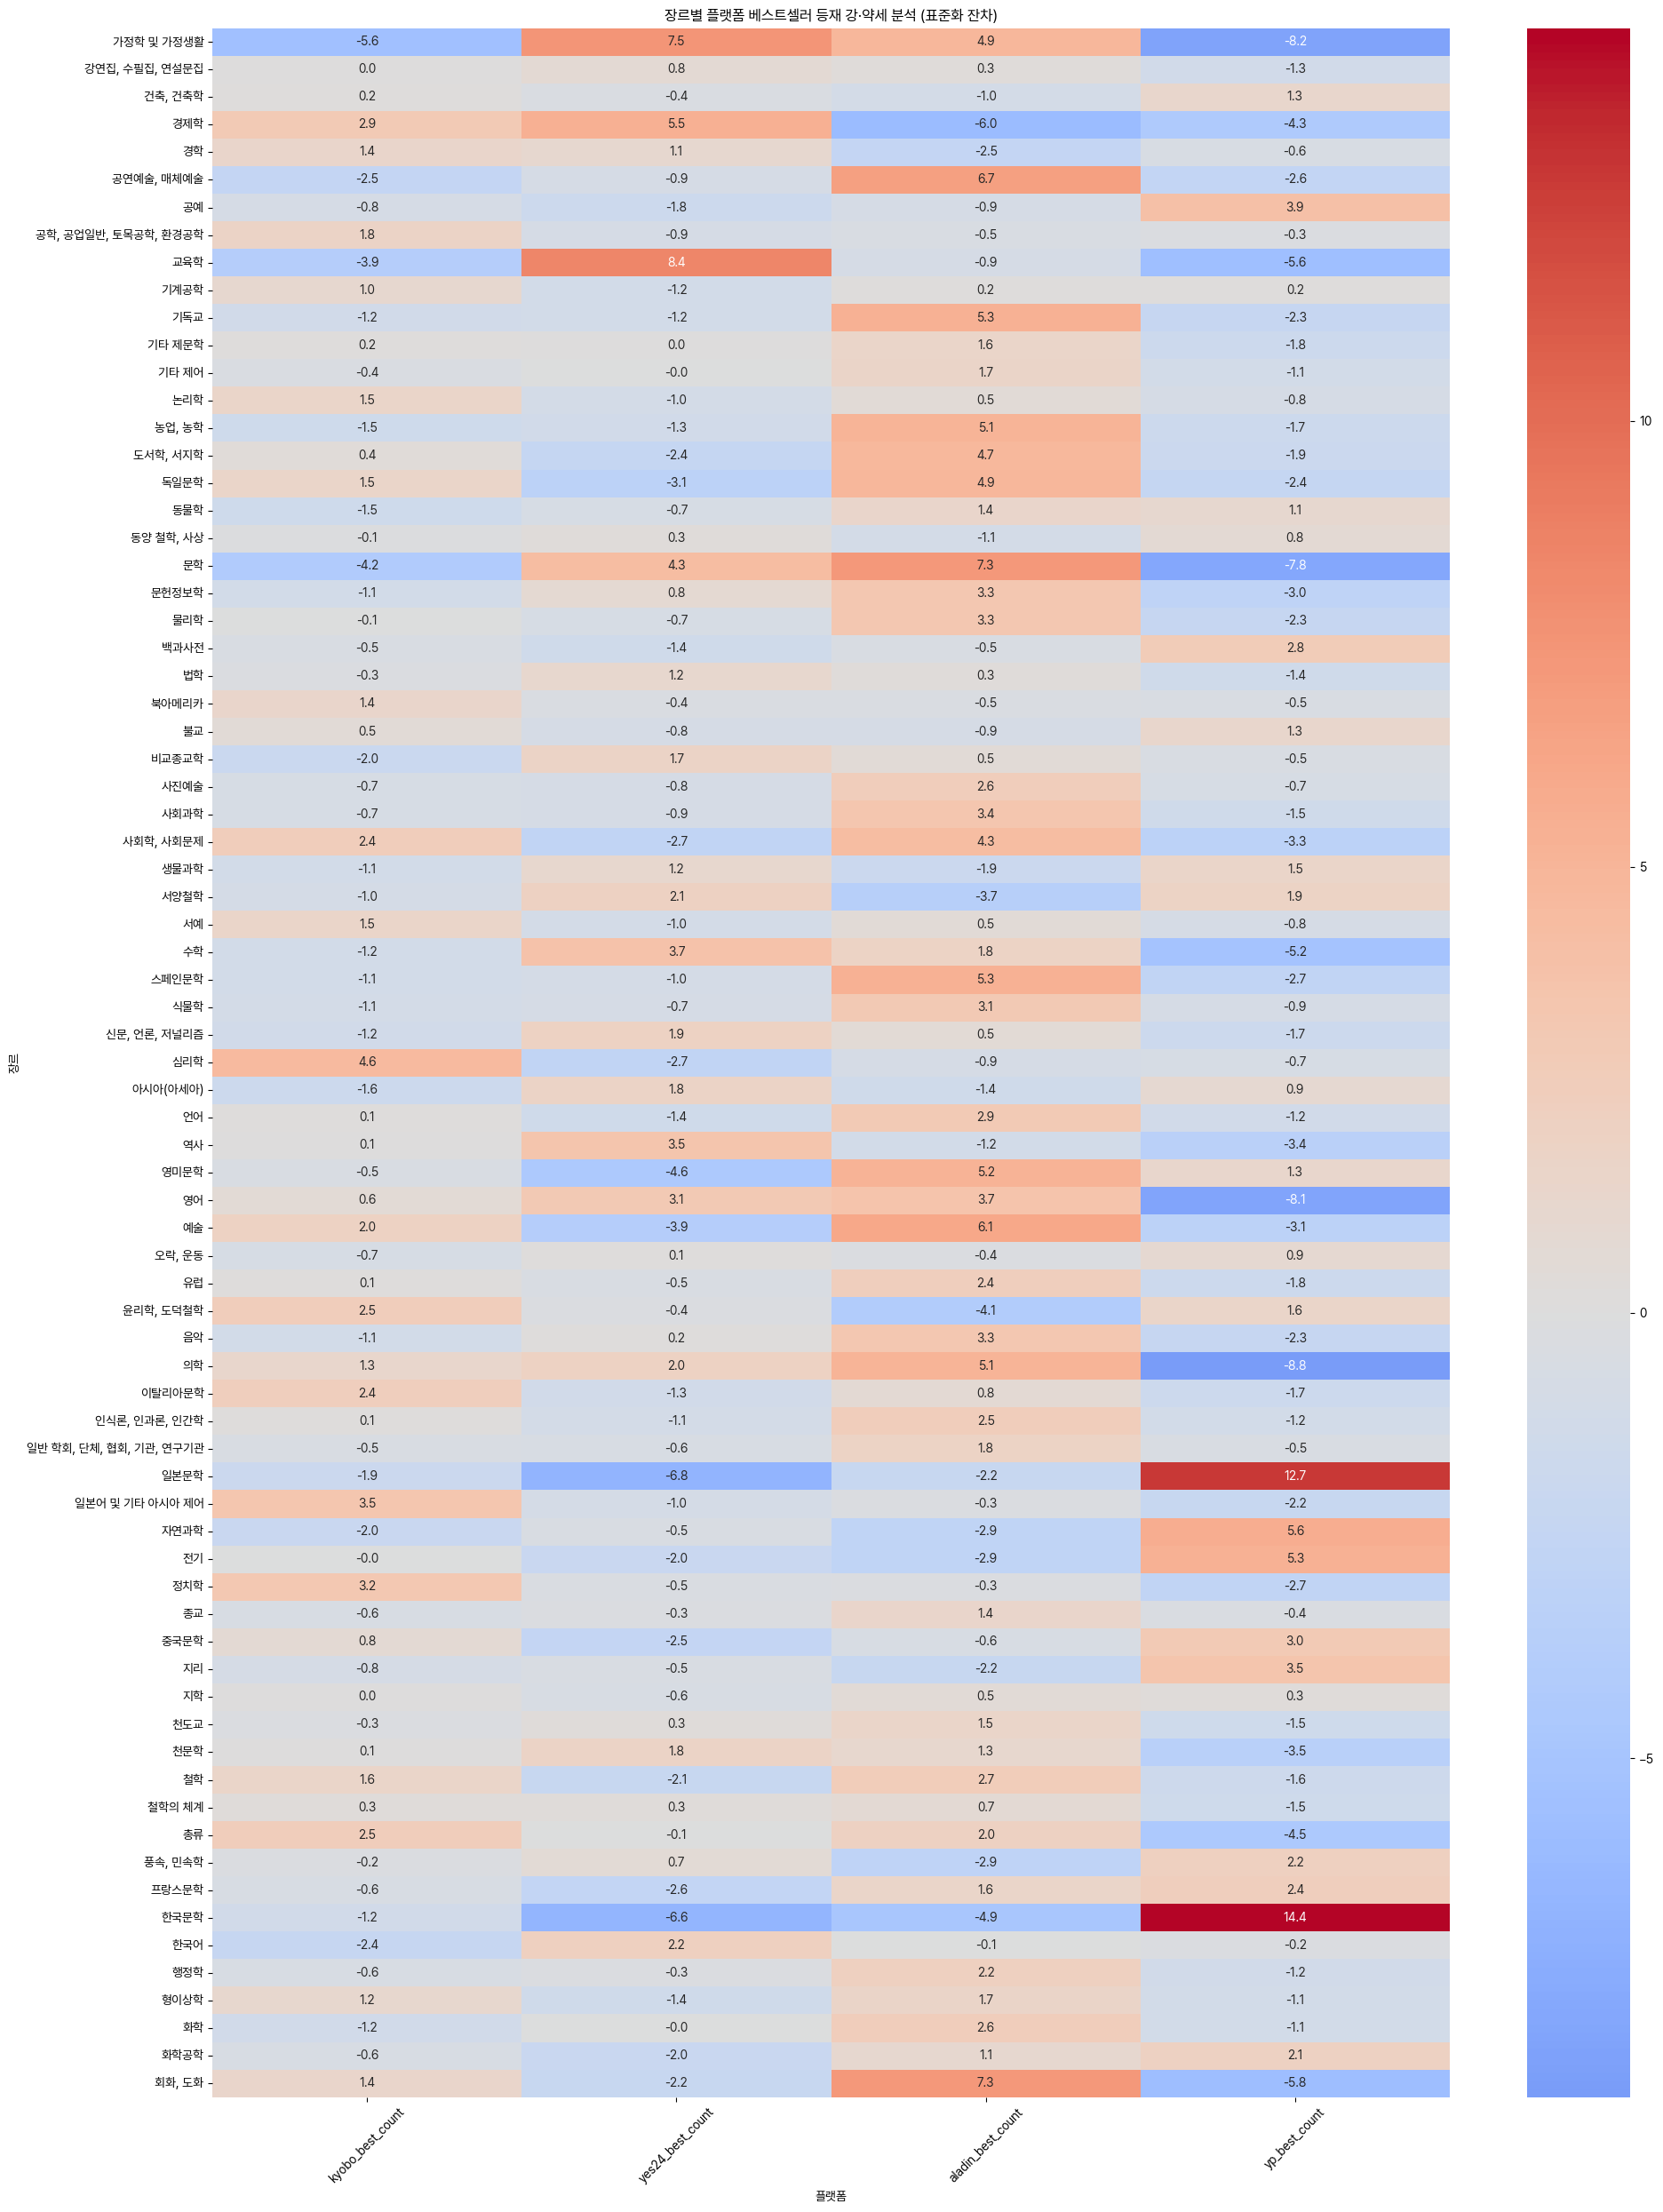

In [9]:
# 3. 잔차 분석(강세 장르 판단)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.font_manager as fm

# 폰트 설정
fontpath = 'C:/Users/user/Desktop/fonts/Pretendard-Bold.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='Pretendard')

residuals = (genre_platform_table - expected) / np.sqrt(expected)

# # 잔차 절댓값이 2 이상인 항목만 필터링
# significant = residuals[(residuals.abs() >= 2)]

plt.figure(figsize=(20, 25))  # 그래프 크기 조절
sns.heatmap(residuals, annot=True, fmt=".1f", cmap="coolwarm", center=0)

plt.title("장르별 플랫폼 베스트셀러 등재 강·약세 분석 (표준화 잔차)")
plt.xlabel("플랫폼")
plt.ylabel("장르")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 분석
- 빨간색(잔차+) : 기대값보다 실제 등재 수가 많음 → 해당 플랫폼의 강세 장르
- 파란색(잔차–) : 기대값보다 실제 등재 수가 적음 → 해당 플랫폼의 약세 장르
- 색이 진할수록 편차가 크고, 통계적으로 유의할 가능성 높음(당연함)

- 플랫폼별 강세ㆍ약세 장르 요약
    * 교보문고
        * 강세장르 : 심리학, 일본어 및 기타 아시아 제어, 정치학
        * 약세장르 : 가정학 및 가정생활, 문학, 교육학
        * → 비문학 계열(인문사회)에 강하고, 문예 장르에는 상대적으로 약세함
    * 예스24
        * 강세장르 : 교육학, 가정학 및 가정생활, 경제학
        * 약세장르 : 한국문학, 일본문학, 영미문학
        * → 학문/실용서 분야에 강하고, 전통적 문예 계열은 약세함
    * 알라딘
        * 강세장르 : 회화(도화), 문학, 예술 전반, 기독교
        * 약세장르 : 경제학, 한국문학, 윤리학
        * → 예술·문화 감성서, 종교서에 강하고, 이론서/인문학은 약세함
    * 영풍문고
        * 강세장르 : 한국문학, 일본문학, 자연과학, 전기
        * 약세장르 : 의학, 가정학 및 가정생활, 영어(-8.1), 문학
        * → 장르소설 및 정서적 콘텐츠에 강하고, 실용학문 분야는 약세함


- 영풍문고 잔차가 유독 큰 이유
    * 특정 장르에서 기대값이 작은데도 실제 등재 수는 매우 컸기 때문에 잔차가 다른 플랫폼에 비해 유독 커진 것

## 다음으로 해야 할 것

### 그 강세 장르에서 정말로 베스트셀러 등재가 많았는가?

- 각 플랫폼별로
    * 강세 장르 상위 3~5개를 고르고
    * 이 장르들이 실제 그 플랫폼에서 베스트셀러 등재 수에 큰 비중을 차지하는지 확인

In [10]:
# 강세 장르 리스트
kb_strong = ['심리학', '일본어 및 기타 아시아 제어', '정치학','윤리학, 도덕철학']
y4_strong = ['교육학', '가정학 및 가정생활', '경제학', '문학']
al_strong = ['회화, 도화', '문학', '공연예술, 매체예술', '예술']
yp_strong = ['한국문학', '일본문학', '자연과학', '전기']

# 전체 베스트셀러 등재 수
total_kb = genre_platform_table['kyobo_best_count'].sum()
total_y4 = genre_platform_table['yes24_best_count'].sum()
total_al = genre_platform_table['aladin_best_count'].sum()
total_yp = genre_platform_table['yp_best_count'].sum()

# 강세 장르의 등재 수 합
strong_total_kb = genre_platform_table.loc[kb_strong, 'kyobo_best_count'].sum()
strong_total_y4 = genre_platform_table.loc[y4_strong, 'yes24_best_count'].sum()
strong_total_al = genre_platform_table.loc[al_strong, 'aladin_best_count'].sum()
strong_total_yp = genre_platform_table.loc[yp_strong, 'yp_best_count'].sum()

# 비중 계산
kb = (strong_total_kb / total_kb) * 100
y4 = (strong_total_y4 / total_y4) * 100
al = (strong_total_al / total_al) * 100
yp = (strong_total_yp / total_yp) * 100

print(f"교보문고 강세 장르 등재 비중: {kb:.2f}%")
print(f"yes24 강세 장르 등재 비중: {y4:.2f}%")
print(f"알라딘 강세 장르 등재 비중: {al:.2f}%")
print(f"영풍문고 강세 장르 등재 비중: {yp:.2f}%")

교보문고 강세 장르 등재 비중: 12.50%
yes24 강세 장르 등재 비중: 36.90%
알라딘 강세 장르 등재 비중: 8.14%
영풍문고 강세 장르 등재 비중: 41.03%


### 결과 해석

- 교보문고 강세 장르 등재 비중: 12.50%
    * 강세 장르 존재는 확인되나, 실재 등재 비중은 낮다 → 딱히 전략적으로 집중하지는 않는 것 같음
- yes24 강세 장르 등재 비중: 36.90%
    * 상대적으로 강세 장르에 등재가 몰려있음 → 부분적 집중 있음
- 알라딘 강세 장르 등재 비중: 8.14%
    * 강세 장르가 존재하지만 실재 등재는 분산됨 → 전략적으로 집중 X
- 영풍문고 강세 장르 등재 비중: 41.03%
    * 강세 장르가 등재 실적의 중심이다 → 가설에 부합함

# 결론

- 카이제곱 검정으로는 플랫폼마다 강세 장르가 통계적으로 유의하게 존재함을 확인했지만, 그 강세 장르가 실제로 베스트셀러 등재에 많이 반영되었는가는 플랫폼별로 차이가 있다.
- 영풍문고와 yes24는 비교적 가설에 부합하였고,
- 교보문고와 알라딘은 강세 장르 존재는 확인되었으나 등재 전략과는 연결이 약한 편이었다.